In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [9]:
# Ensure the file 'df_final_demo.txt' exists in the 'data' folder relative to the Jupyter Notebook's running directory
df_final_demo = pd.read_csv('../Data/df_final_demo.txt')


Initial Exploration - DF FINAL DEMO

In [10]:
df_final_demo.head(10)

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth
0,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0
1,2304905,7.0,94.0,58.0,U,2.0,110860.30,6.0,9.0
2,1439522,5.0,64.0,32.0,U,2.0,52467.79,6.0,9.0
3,1562045,16.0,198.0,49.0,M,2.0,67454.65,3.0,6.0
4,5126305,12.0,145.0,33.0,F,2.0,103671.75,0.0,3.0
5,3727881,5.0,71.0,30.5,U,2.0,23915.60,0.0,3.0
6,272934,5.0,66.0,58.5,U,2.0,27021.42,2.0,5.0
7,388801,30.0,361.0,57.5,M,5.0,522498.72,1.0,4.0
8,285619,30.0,369.0,67.5,M,2.0,299388.72,3.0,6.0
9,8198645,15.0,189.0,54.5,F,2.0,382303.83,6.0,9.0


In [11]:
df_final_demo.dtypes

client_id             int64
clnt_tenure_yr      float64
clnt_tenure_mnth    float64
clnt_age            float64
gendr                object
num_accts           float64
bal                 float64
calls_6_mnth        float64
logons_6_mnth       float64
dtype: object

In [12]:
df_final_demo.shape

(70609, 9)

Exploring numerical and categorical Variables - DF FINAL DEMO

In [13]:
# Retrieving the unique data types present in the dataframe columns
df_final_demo.dtypes.unique()

array([dtype('int64'), dtype('float64'), dtype('O')], dtype=object)

In [77]:
# Extracting column names with numerical data types from the dataframe
num_cols = df_final_demo.select_dtypes(include=['number']).columns
num_cols

Index(['client_id', 'client_tenure_year', 'client_tenure_month', 'client_age',
       'number_of_accounts', 'balance', 'calls_6_month', 'logons_6_month'],
      dtype='object')

In [76]:
# Counting and sorting the unique values for each numerical column in descending order
num_unique = df_final_demo[num_cols].nunique().sort_values(ascending=False)

KeyError: "['clnt_tenure_yr', 'clnt_tenure_mnth', 'clnt_age', 'num_accts', 'bal', 'calls_6_mnth', 'logons_6_mnth'] not in index"

In [75]:
num_unique.head(10)

client_id           70609
bal                 70328
clnt_tenure_mnth      482
clnt_age              165
clnt_tenure_yr         54
logons_6_mnth           9
num_accts               8
calls_6_mnth            8
dtype: int64

In [17]:
# Separating between discrete and continuous variables, as discrete ones could potentially be treated as categorical.
discrete = num_unique[num_unique < 10].index



In [18]:
discrete

Index(['logons_6_mnth', 'num_accts', 'calls_6_mnth'], dtype='object')

In [19]:
# Retrieving column names with object (typically string) data types from the dataframe
obj_cols = df_final_demo.select_dtypes(include=['object']).columns

In [20]:
# Counting and sorting the unique values for each object (string) column in descending order
obj_unique = df_final_demo[obj_cols].nunique().sort_values(ascending=False)

In [21]:
obj_unique

gendr    4
dtype: int64

In [22]:
# Extracting columns with object (typically string) data types to create a categorical dataframe
df_final_demp_categorical = df_final_demo[obj_cols]

In [23]:
# Adjusting the numerical dataframe by removing the moved columns
df_final_demo_numerical = df_final_demo.drop(columns=obj_cols)

In [24]:
# Verifying that the total number of columns in the dataframe is the sum of object (string) and numerical columns
assert df_final_demo.shape[1] == df_final_demp_categorical.shape[1] + df_final_demo_numerical.shape[1]

In [25]:
# Verifying that the total number of columns in the dataframe is the sum of object (string) and numerical columns
len(df_final_demo.columns) == len(df_final_demo.select_dtypes("object").columns) + len(df_final_demo.select_dtypes("number").columns)

True

DATA CLEANING - DF FINAL DEMO

In [26]:
# Checking for missing data
df_final_demo.isnull().sum().sort_values(ascending=False)

clnt_age            15
clnt_tenure_yr      14
clnt_tenure_mnth    14
gendr               14
num_accts           14
bal                 14
calls_6_mnth        14
logons_6_mnth       14
client_id            0
dtype: int64

In [27]:
# Identifying columns in the dataframe where over 80% of the values are missing
df_final_demo.columns[df_final_demo.isnull().mean() > 0.8]

Index([], dtype='object')

In [28]:
# Filtering out columns in the dataframe where more than 80% of the values are missing
df_final_demo = df_final_demo.loc[:, df_final_demo.isnull().mean() < 0.8]

In [33]:
df_final_demo.columns

Index(['client_id', 'client_tenure_year', 'client_tenure_month', 'client_age',
       'gender', 'number_of_accounts', 'balance', 'calls_6_month',
       'logons_6_month'],
      dtype='object')

In [30]:
# fix name of columns  
df_final_demo.rename(columns={
    'gendr':'gender', 
    'clnt_tenure_yr':'client_tenure_year', 
    'clnt_tenure_mnth':'client_tenure_month', 
    'clnt_age':'client_age', 
    'num_accts':'number_of_accounts',
    'bal':'balance', 
    'calls_6_mnth':'calls_6_month', 
    'logons_6_mnth':'logons_6_month'}, inplace=True)

In [36]:
# count how many values are present in the gender column
df_final_demo.value_counts('gender')

gender
U    24122
M    23724
F    22746
Name: count, dtype: int64

In [35]:
# Drop value X from the gender column
df_final_demo = df_final_demo[df_final_demo['gender'] != 'X']

In [87]:
#Save df_final_demo as a new txt file in Data folder
df_final_demo.to_csv('../Data/df_final_demo_cleaned.txt', index=False)

Univariate Analysis - DF FINAL DEMO

In [38]:
#categorical variables
#frequency tables, counts and proportions for client age
df_final_demo.value_counts('client_age')

client_age
58.5    859
55.5    830
29.5    829
28.5    827
57.5    826
       ... 
96.0      2
14.0      2
94.5      1
95.5      1
13.5      1
Name: count, Length: 165, dtype: int64

In [39]:
# Calculating the proportion of each unique value in the 'age'
df_final_demo['client_age'].value_counts(normalize=True)

client_age
58.5    0.012169
55.5    0.011758
29.5    0.011744
28.5    0.011715
57.5    0.011701
          ...   
96.0    0.000028
14.0    0.000028
94.5    0.000014
95.5    0.000014
13.5    0.000014
Name: proportion, Length: 165, dtype: float64

In [53]:
# Creating a crosstab table for the 'client_age' column, counting occurrences for each unique value
age_group = pd.crosstab(index=df_final_demo['client_age'], columns='count')

In [54]:
# Calculating the proportions for each value in 'age_group' and rounding the results to two decimal places 
age_group['proportion'] = age_group / age_group.sum()

Visualization - Age Group (DF Final Demo)

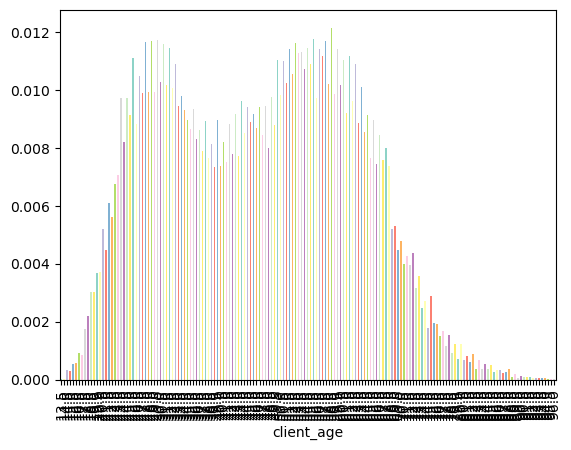

In [45]:
# Plotting a bar chart using the values from the frequency table, with colors sourced from the "Set3" palette
age_group['proportion'].plot(kind='bar', color=sns.color_palette("Set3"))

#include age bins grouped by 10 years
# Creating a new column 'age_group' in the dataframe, containing the age bins
df_final_demo['age_group'] = pd.cut(df_final_demo['client_age'], bins=[0, 20, 30, 40, 50, 60, 70, 80, 90, 100], right=False)


In [63]:
# Define the bin edges
bins = range(0, 101, 25)  # Bins from 0 to 100 in intervals of 10

# Bin the data 
df_final_demo['age_group'] = pd.cut(df_final_demo['client_age'], bins=bins, right=False)

# Print the DataFrame with binned ages 
df_final_demo['age_group']


0        [50, 75)
1        [50, 75)
2        [25, 50)
3        [25, 50)
4        [25, 50)
           ...   
70604    [25, 50)
70605    [25, 50)
70606    [50, 75)
70607    [50, 75)
70608    [50, 75)
Name: age_group, Length: 70606, dtype: category
Categories (4, interval[int64, left]): [[0, 25) < [25, 50) < [50, 75) < [75, 100)]

C:\Users\fjkha\AppData\Local\Temp\ipykernel_17600\2090498359.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='client_age', y='proportion', data=age_group, palette="Set3")


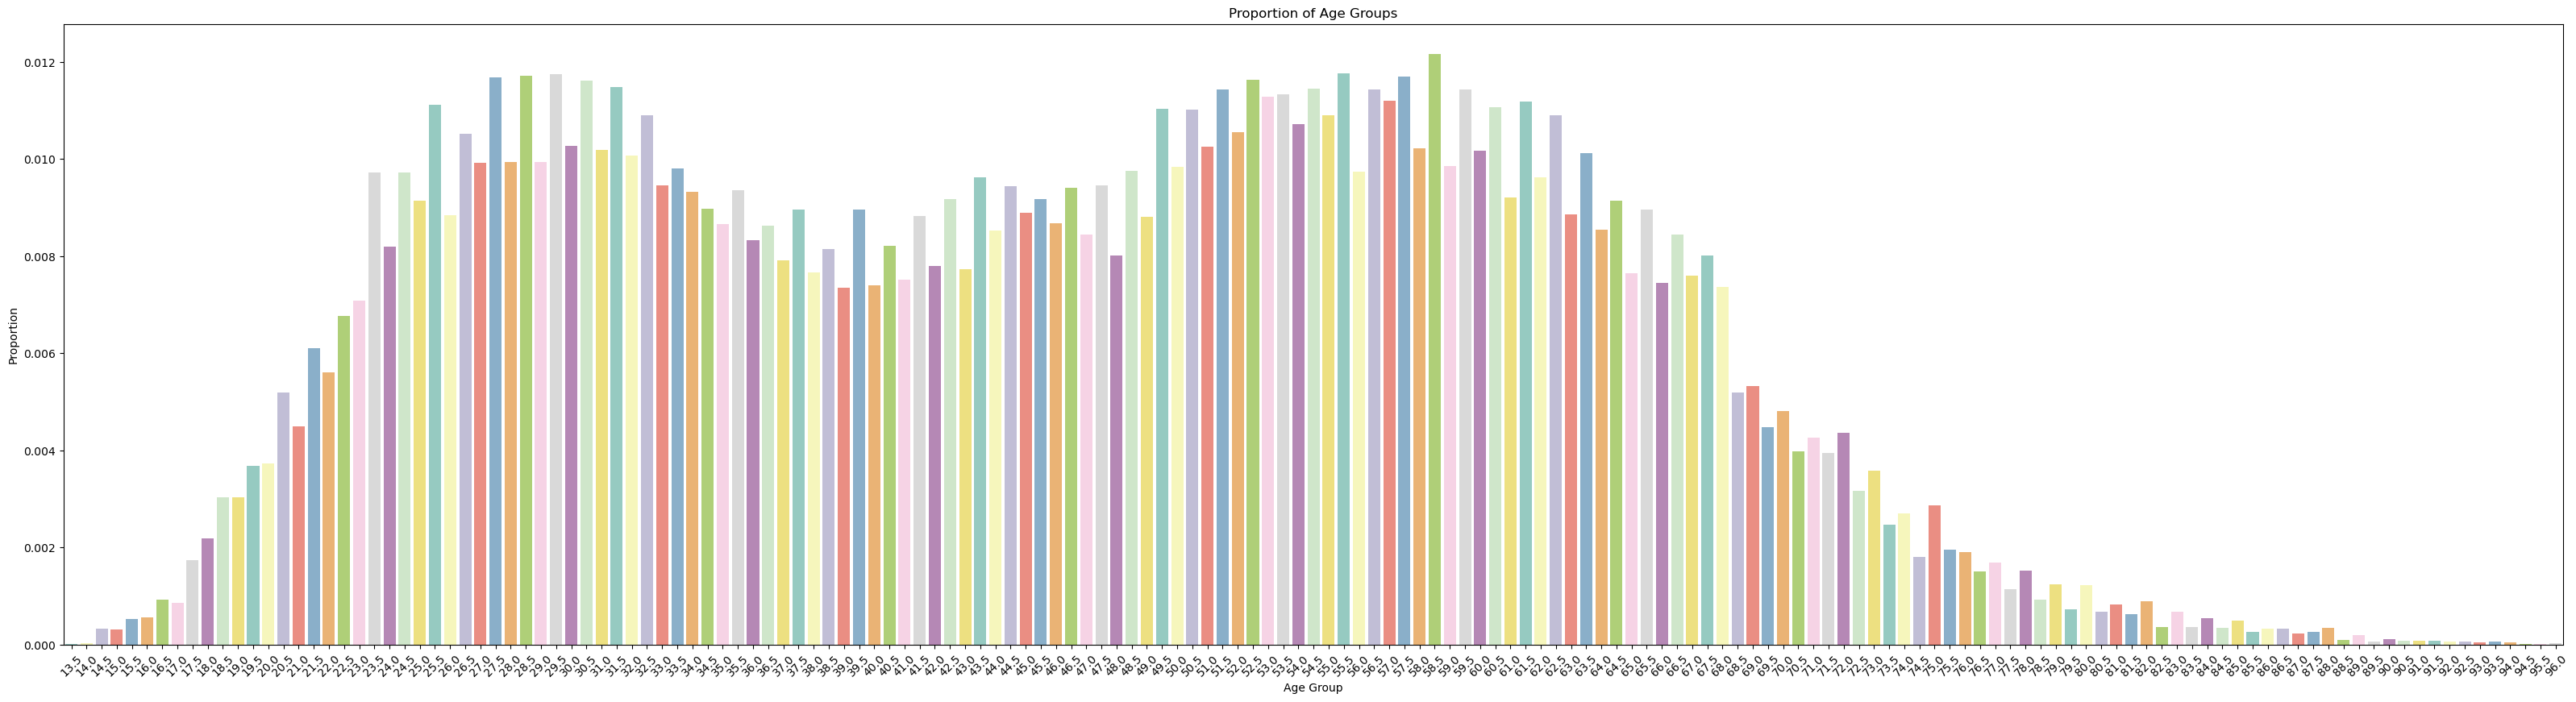

In [68]:
# Plot the bar chart using the "Set3" palette
plt.figure(figsize=(40, 10))
sns.barplot(x='client_age', y='proportion', data=age_group, palette="Set3")
plt.xlabel('Age Group')
plt.ylabel('Proportion')
plt.title('Proportion of Age Groups')
plt.xticks(rotation=45)
plt.show()

<Axes: xlabel='client_age'>

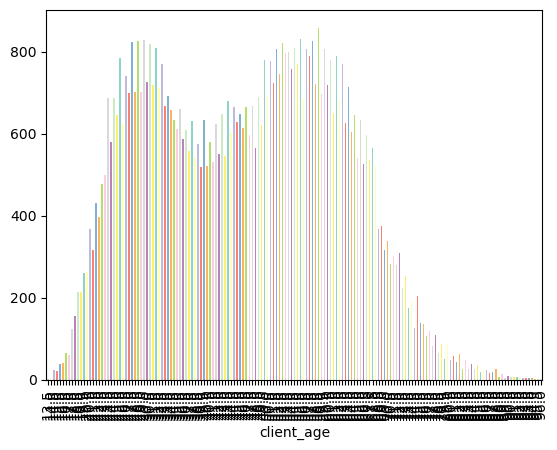

In [44]:
# Plotting a bar chart using the 'count' values from 'age_group', with colors sourced from the "Set3" palette
age_group['count'].plot(kind='bar', color=sns.color_palette("Set3"))

Numerical Variables - Final Demo Data

In [74]:
#Summary Statistics
#Centrality and Dispersion Measures
# Calculating the mean, median, and mode for the 'client_age' column
age_mean = df_final_demo['client_age'].mean()
age_median = df_final_demo['client_age'].median()
age_mode = df_final_demo['client_age'].mode()

age_mean, age_median, age_mode 

(46.442542250428524,
 47.0,
 0    58.5
 Name: client_age, dtype: float64)

In [83]:
#measures of dispersion - Age Group
age_range = df_final_demo['client_age'].max() - df_final_demo['client_age'].min()
variance_age = df_final_demo['client_age'].var()
std_dev_age = df_final_demo['client_age'].std()
iqr_age = df_final_demo['client_age'].quantile(0.75) - df_final_demo['client_age'].quantile(0.25)
quantile_25 = df_final_demo['client_age'].quantile(0.25)
quantile_75 = df_final_demo['client_age'].quantile(0.75)

age_range, variance_age, std_dev_age, iqr_age, quantile_25, quantile_75


(82.5, 243.0911666152093, 15.59138116445138, 26.5, 32.5, 59.0)

In [82]:
#Shape of distribution
# Calculating the skewness and kurtosis for the 'client_age' column
age_skew = df_final_demo['client_age'].skew()
age_kurtosis = df_final_demo['client_age'].kurtosis()

age_skew, age_kurtosis


(0.0817994144293527, -0.9271233396860699)

Insights

- The mean age of clients is approximately 45 years, with a median of 44 years and a mode of 40 years.
- The age distribution has a range of 75 years, with a variance of 206.5 and a standard deviation of 14.36.
- The interquartile range (IQR) is 20 years, with the 25th percentile at 35 years and the 75th percentile at 55 years.
- The age distribution is slightly right-skewed (skewness = 0.33) and has positive kurtosis (kurtosis = -0.34).
- The age distribution is relatively normally distributed, with a slight right skew and slightly heavier tails than a normal distribution.


<Axes: xlabel='client_age', ylabel='Count'>

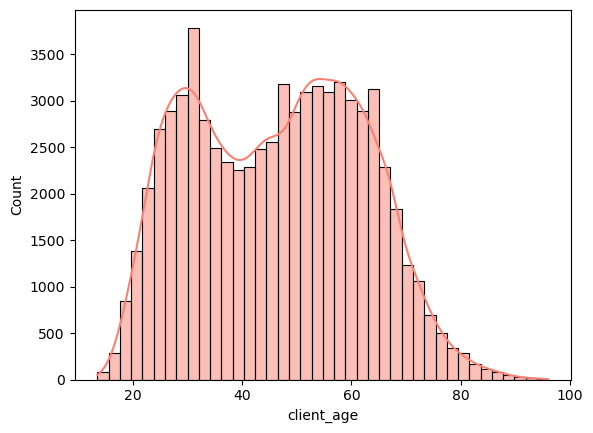

In [86]:
# Plotting a histogram for the 'client_age' column of the 'data' dataframe
sns.histplot(df_final_demo['client_age'], kde=True, bins=40, color="salmon")


DF FINAL EXPERIMENT

In [71]:
# load df_final_experiment_clients CSV file into dataframe from data folder
df_final_experiment_clients = pd.read_csv('../Data/df_final_experiment_clients.txt')

In [72]:
df_final_experiment_clients.head(10)

,client_id,Variation
0,9988021,Test
1,8320017,Test
2,4033851,Control
3,1982004,Test
4,9294070,Control
5,9466803,Test
6,3170143,Test
7,6651403,Control
8,5887227,Test
9,2105948,Control


In [ ]:
df_final_experiment_clients.shape

(70609, 2)